AdaBoost만 사용해서 사람얼굴 학습
사람이름이 Ariel Sharon 이라는 사람의 얼굴 부분만 해서 검출

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.94


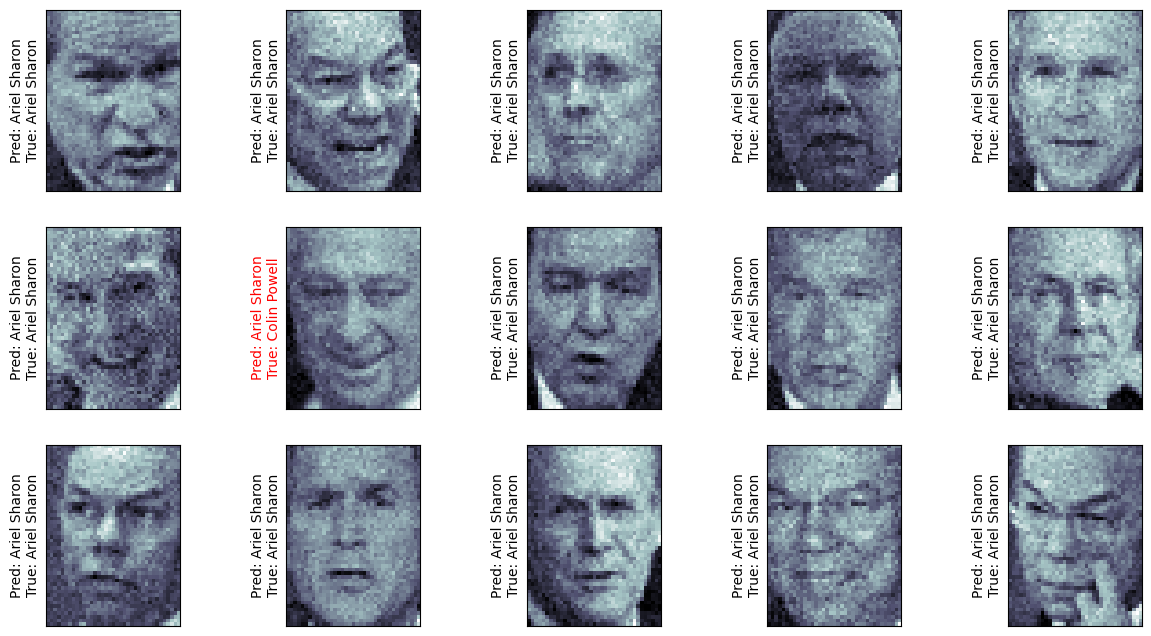

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
# 에이다부스트 분류기
from sklearn.ensemble import AdaBoostClassifier
# 결정트리 분류기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 노이즈 추가 함수
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0, 255)
    return noisy_images

# LFW(얼굴 데이터셋) 데이터 로드
# min_faces_per_person: 사람당 최소 얼굴 갯수
# resize=0.4 실제 사진 사이즈에서 축소
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# 데이터와 라벨 준비
# X : 얼굴 이미지
X = lfw_people.data
# y : 사람 식별 번호
y = lfw_people.target
# 사람 이름
target_names = lfw_people.target_names

# 특정 인물만 골라 분류하기 (예: Ariel Sharon)
y = (y == np.where(target_names == 'Ariel Sharon')[0][0]).astype(int)

# 데이터 분할
# 학습 70%, 테스트 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = add_noise(X_train, noise_factor=0.05)
X_test = add_noise(X_test, noise_factor=0.05)

# AdaBoost 분류기 설정
# DecisionTreeClassifier를 약한 학습자로 사용
base_estimator = DecisionTreeClassifier(max_depth=1)
# estimator 갯수 50개, 결정트리분류기 깊이 1
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=0)

# 모델 훈련
adaboost.fit(X_train, y_train)

# 예측 및 평가
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# 예측 결과 시각화
fig, ax = plt.subplots(3, 5, figsize=(15, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(50, 37), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(f'Pred: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}',
                   color='black' if y_pred[i] == y_test[i] else 'red')
plt.show()

결론은 아니고 추론 

1. 특정 인물인지를 파악하는 문제

예) Ariel Sharon 특정 인물만 분류하는 이진 문제니, 결과가 0 아니면 1이 나오기 때문에, 노이즈 처리를 해도 비슷한 결과가 나올 수 있음

2. 결정 트리 깊이가 1이라 매우 단순한 모델을 사용 -> 과소적합을 일으킬 수 있어서 데이터의 충분한 복잡성을 학습하지 못할 수 있응ㅁ

모든 인물을 포함하는 다중 클래스 문제 분류 -> 결정 트리 복잡성 증가, 노이즈

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.48


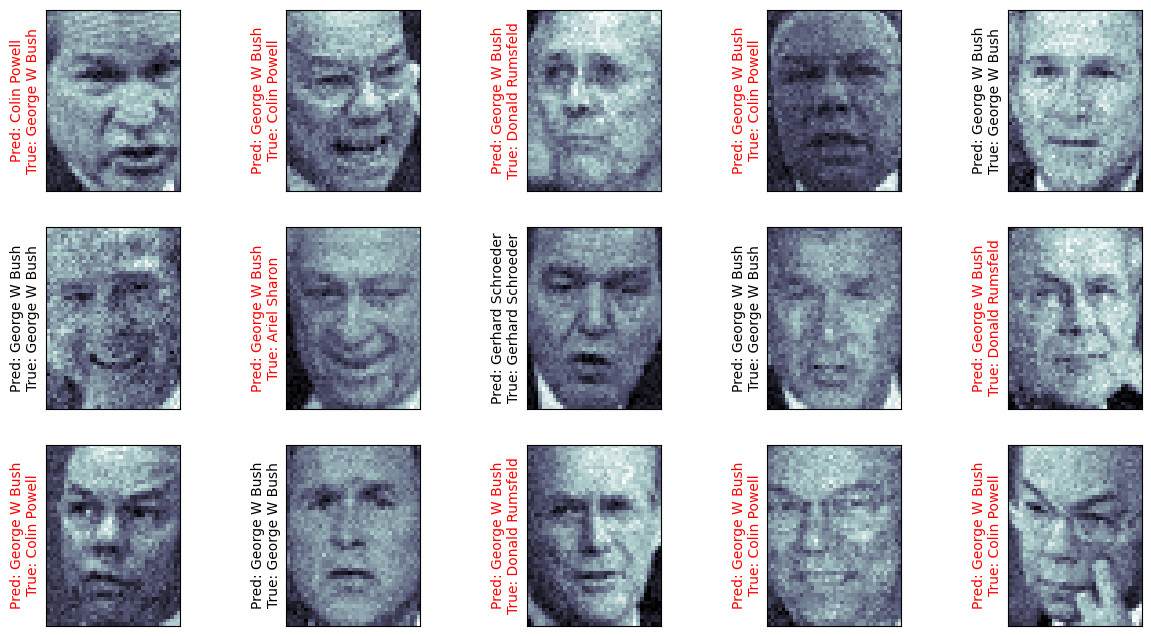

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 노이즈 추가 함수
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0, 255)
    return noisy_images

# LFW 데이터 로드
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # 얼굴 이미지 데이터
y = lfw_people.target  # 식별번호
target_names = lfw_people.target_names  # 인물 이름

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 노이즈 추가
X_train = add_noise(X_train, noise_factor=0.05)  # 노이즈 레벨 조정
X_test = add_noise(X_test, noise_factor=0.05)

# AdaBoost 분류기 설정, 결정 트리의 복잡성 증가
base_estimator = DecisionTreeClassifier(max_depth=3)  # max_depth 변경
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=0)

# 모델 훈련
adaboost.fit(X_train, y_train)

# 예측 및 평가
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 예측 결과 시각화
fig, ax = plt.subplots(3, 5, figsize=(15, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(50, 37), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(f'Pred: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}',
                   color='black' if y_pred[i] == y_test[i] else 'red')
plt.show()
